BZAN 542

Charles Liu

# Packages

In [1]:
library('dplyr')
library('arules')


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: Matrix


Attaching package: ‘arules’


The following object is masked from ‘package:dplyr’:

    recode


The following objects are masked from ‘package:base’:

    abbreviate, write




# Data

## Read the file as data frame.

In [2]:
lastfm <- read.csv("lastfm.csv")
head(lastfm)
dim(lastfm)

,user,artist,sex,country
,<int>,<chr>,<chr>,<chr>
1,1,red hot chili peppers,f,Germany
2,1,the black dahlia murder,f,Germany
3,1,goldfrapp,f,Germany
4,1,dropkick murphys,f,Germany
5,1,le tigre,f,Germany
6,1,schandmaul,f,Germany


[1] 289955      4

In [3]:
summarise_all(lastfm, n_distinct)

user,artist,sex,country
<int>,<int>,<int>,<int>
15000,1004,2,159


In [4]:
playlist=lastfm %>%
    group_by(user) %>%
    summarize(artists=list(unique(artist)))
head(playlist)
dim(playlist)

user,artists
<int>,<list>
1,"red hot chili peppers , the black dahlia murder, goldfrapp , dropkick murphys , le tigre , schandmaul , edguy , jack johnson , eluveitie , the killers , judas priest , rob zombie , john mayer , the who , guano apes , the rolling stones"
3,"devendra banhart , boards of canada , cocorosie , aphex twin , animal collective , atmosphere , joanna newsom , air , portishead , massive attack , broken social scene, arcade fire , plaid , prefuse 73 , m83 , the flashbulb , pavement , goldfrapp , amon tobin , sage francis , four tet , max richter , autechre , radiohead , neutral milk hotel , beastie boys , aesop rock , mf doom , the books"
4,"tv on the radio , tool , kyuss , dj shadow , air , a tribe called quest , the cinematic orchestra, beck , bon iver , röyksopp , bonobo , the decemberists , snow patrol , battles , the prodigy , pink floyd , rjd2 , the flaming lips , michael jackson , mgmt , the rolling stones , late of the pier , flight of the conchords, simian mobile disco , muse , fleetwood mac , led zeppelin"
5,"dream theater , ac/dc , metallica , iron maiden , bob marley & the wailers, megadeth , children of bodom , trivium , nightwish , sublime , volbeat"
6,"lily allen , kanye west , sigur rós , pink floyd , stevie wonder , metallica , thievery corporation, iron maiden , the streets , muse , faith no more , manu chao , tenacious d , depeche mode , justin timberlake , green day , snow patrol , dream theater , u2 , jay-z , type o negative , pearl jam , queen"
7,"soundgarden , stone temple pilots, buckethead , dream theater , alice in chains , type o negative , pink floyd , rush , king crimson , camel , ac/dc , tool , disturbed , oasis , jethro tull , porcupine tree , audioslave , aerosmith , pearl jam , the verve , rammstein , led zeppelin"


[1] 15000     2

## The package `arules` use the `transactions` data structure.

In [5]:
playlist=as(playlist$artists, 'transactions')
playlist

transactions in sparse format with
 6 transactions (rows) and
 1004 items (columns)

[1] 15000  1004

In [6]:
inspect(head(playlist))

    items                     
[1] {dropkick murphys,        
     edguy,                   
     eluveitie,               
     goldfrapp,               
     guano apes,              
     jack johnson,            
     john mayer,              
     judas priest,            
     le tigre,                
     red hot chili peppers,   
     rob zombie,              
     schandmaul,              
     the black dahlia murder, 
     the killers,             
     the rolling stones,      
     the who}                 
[2] {aesop rock,              
     air,                     
     amon tobin,              
     animal collective,       
     aphex twin,              
     arcade fire,             
     atmosphere,              
     autechre,                
     beastie boys,            
     boards of canada,        
     broken social scene,     
     cocorosie,               
     devendra banhart,        
     four tet,                
     goldfrapp,               
     joa

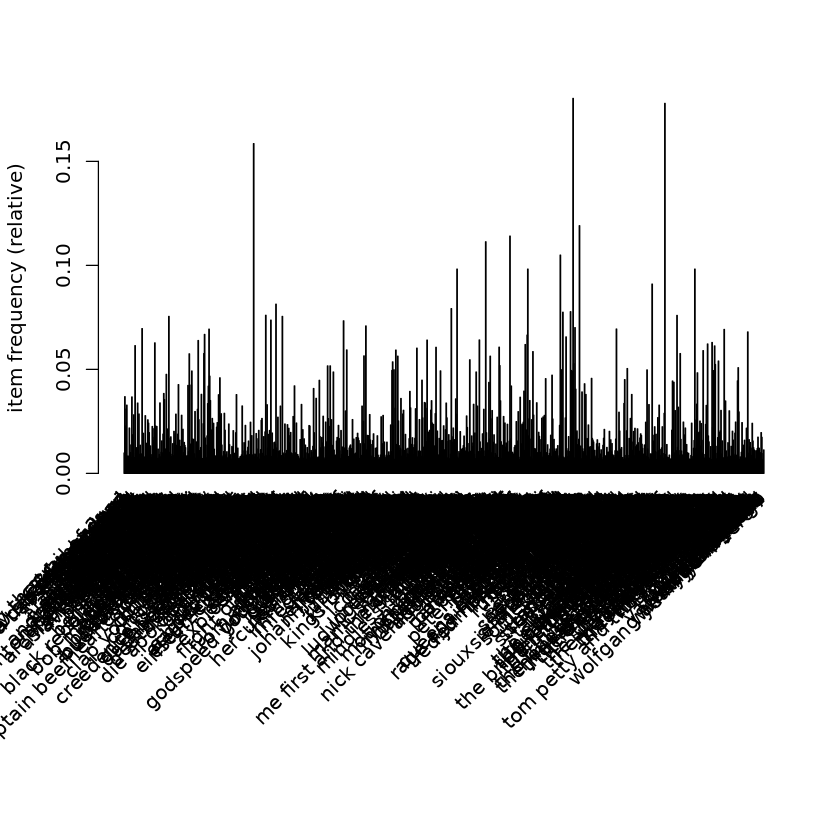

In [7]:
itemFrequencyPlot(playlist)

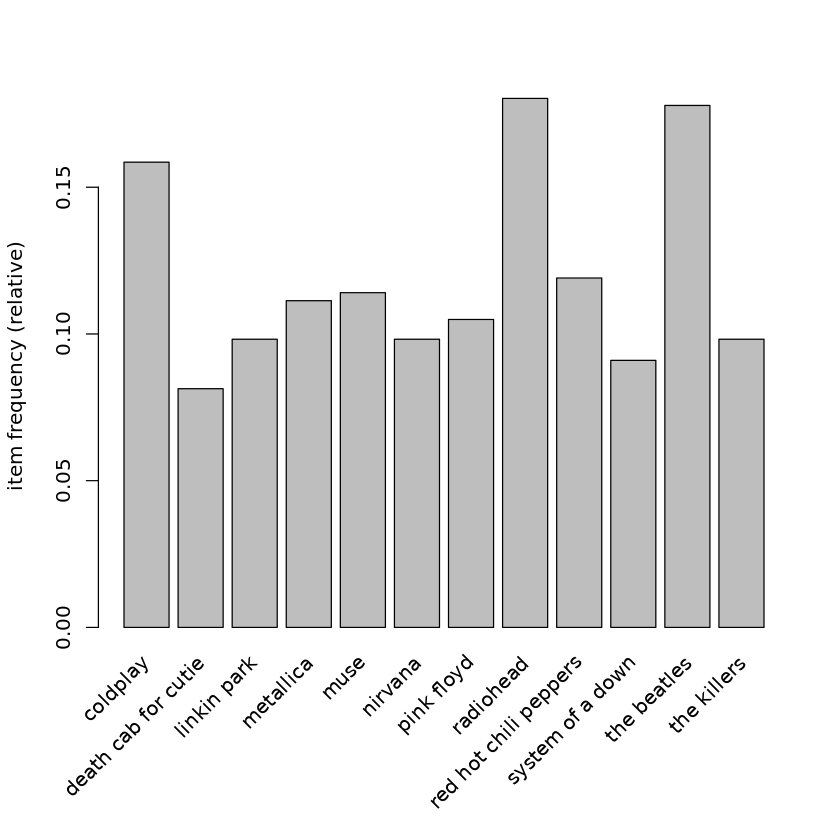

In [8]:
itemFrequencyPlot(playlist, support=0.08)

# Association Rules

In [9]:
musicrules=apriori(playlist, parameter=list(support=0.01, confidence=0.5))
summary(musicrules)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5    0.01      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 150 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[1004 item(s), 15000 transaction(s)] done [0.07s].
sorting and recoding items ... [655 item(s)] done [0.01s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 4 done [0.02s].
writing ... [50 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 50 rules

rule length distribution (lhs + rhs):sizes
 2  3 
15 35 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    2.0     2.0     3.0     2.7     3.0     3.0 

summary of quality measures:
    support          confidence        coverage            lift       
 Min.   :0.01000   Min.   :0.5013   Min.   :0.01587   Min.   : 2.781  
 1st Qu.:0.01062   1st Qu.:0.5216   1st Qu.:0.01847   1st Qu.: 3.120  
 Median :0.01147   Median :0.5430   Median :0.02150   Median : 3.283  
 Mean   :0.01296   Mean   :0.5556   Mean   :0.02359   Mean   : 3.963  
 3rd Qu.:0.01372   3rd Qu.:0.5858   3rd Qu.:0.02655   3rd Qu.: 3.711  
 Max.   :0.02927   Max.   :0.6627   Max.   :0.05747   Max.   :13.416  
     count      
 Min.   :150.0  
 1st Qu.:159.2  
 Median :172.0  
 Mean   :194.4  
 3rd Qu.:205.8  
 Max.   :439.0  

mining info:
     data ntransactions support confidence
 playlist         15000    0.01        0.5

In [10]:
musicrules

set of 50 rules 

In [11]:
inspect(musicrules)

     lhs                                    rhs            support   
[1]  {t.i.}                              => {kanye west}   0.01040000
[2]  {the pussycat dolls}                => {rihanna}      0.01040000
[3]  {the fray}                          => {coldplay}     0.01126667
[4]  {sonata arctica}                    => {nightwish}    0.01346667
[5]  {judas priest}                      => {iron maiden}  0.01353333
[6]  {the kinks}                         => {the beatles}  0.01360000
[7]  {travis}                            => {coldplay}     0.01373333
[8]  {the flaming lips}                  => {radiohead}    0.01306667
[9]  {megadeth}                          => {metallica}    0.01626667
[10] {simon & garfunkel}                 => {the beatles}  0.01540000
[11] {broken social scene}               => {radiohead}    0.01506667
[12] {blur}                              => {radiohead}    0.01753333
[13] {keane}                             => {coldplay}     0.02226667
[14] {snow patrol}  

In [12]:
inspect(subset(musicrules, lift > 5))

    lhs                         rhs            support    confidence coverage  
[1] {t.i.}                   => {kanye west}   0.01040000 0.5672727  0.01833333
[2] {the pussycat dolls}     => {rihanna}      0.01040000 0.5777778  0.01800000
[3] {sonata arctica}         => {nightwish}    0.01346667 0.5101010  0.02640000
[4] {judas priest}           => {iron maiden}  0.01353333 0.5075000  0.02666667
[5] {led zeppelin,the doors} => {pink floyd}   0.01066667 0.5970149  0.01786667
[6] {pink floyd,the doors}   => {led zeppelin} 0.01066667 0.5387205  0.01980000
    lift      count
[1]  8.854413 156  
[2] 13.415893 156  
[3]  8.236292 202  
[4]  8.562992 203  
[5]  5.689469 160  
[6]  6.802027 160  


In [13]:
inspect(sort(subset(musicrules, lift > 5), by="confidence"))

    lhs                         rhs            support    confidence coverage  
[1] {led zeppelin,the doors} => {pink floyd}   0.01066667 0.5970149  0.01786667
[2] {the pussycat dolls}     => {rihanna}      0.01040000 0.5777778  0.01800000
[3] {t.i.}                   => {kanye west}   0.01040000 0.5672727  0.01833333
[4] {pink floyd,the doors}   => {led zeppelin} 0.01066667 0.5387205  0.01980000
[5] {sonata arctica}         => {nightwish}    0.01346667 0.5101010  0.02640000
[6] {judas priest}           => {iron maiden}  0.01353333 0.5075000  0.02666667
    lift      count
[1]  5.689469 160  
[2] 13.415893 156  
[3]  8.854413 156  
[4]  6.802027 160  
[5]  8.236292 202  
[6]  8.562992 203  
